In [21]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
data_nba = pd.read_csv('all_seasons.csv') 

height = np.array(data_nba['player_height'])
print(height)


[193.04 190.5  203.2  ... 205.74 208.28 205.74]


In [8]:
print('Mean height:       ', height.mean())
print("Standard deviation:", height.std())
print("Minimum height:    ", height.min())
print("Maximum height:    ", height.max())

Mean height:        200.555096543133
Standard deviation: 9.110735524904456
Minimum height:     160.02
Maximum height:     231.14


In [6]:
print('25th percentil:      ', np.percentile(height,25))
print('Median:              ', np.median(height))
print('75th percentile:     ', np.percentile(height,75))

25th percentil:       193.04
Median:               200.66
75th percentile:      208.28


Text(0, 0.5, 'Number')

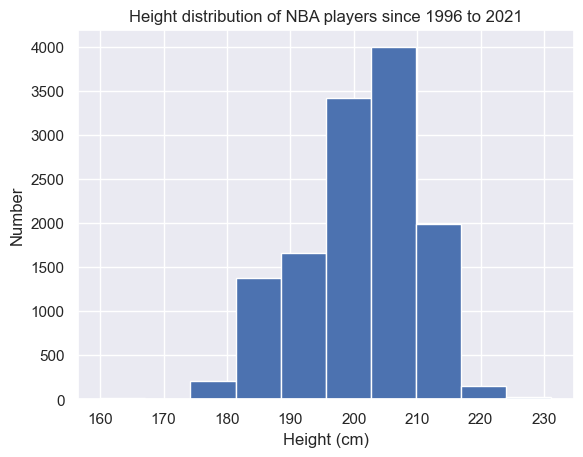

In [4]:
import matplotlib.pyplot as plt
import seaborn ; seaborn.set()  #this set plot style

plt.hist(height)
plt.title('Height distribution of NBA players since 1996 to 2021')
plt.xlabel('Height (cm)')
plt.ylabel('Number')



# Now i'm going to analyce the correlation of height with the percentage of rebounds.


In [67]:

data = pd.DataFrame(data_nba)


#Para asegurar obtener datos de una temporada añadimos un filtro que determine si el jugador jugó al menos 40 partidos
# To be sure about a season we add a filter with the objetive of determine if the player played al least 40 games
data = data[ data['gp'] >= 40 ]


#Creamos un indice de rendimiento simple para cada jugador (puntos + rebotes + asistencias)
#I proceed to create a simple stat for every player( points + rebounds + assist)
data['rendimiento'] = data['pts'] + data['reb'] + data['ast'] 

#Now group by player
#Agrupamos por jugador
players = data.groupby('player_name')

#Buscamos la mejor temporada de cada jugador
#We find the best season of each player.
best_season = players['rendimiento'].idxmax()

#Filtramos el Dataframe original para quedarnos con la mejor temporada de cada jugador
#Filter the original dataframe for keep with the best season of each player
clean_data = data.loc[best_season]

#Ahora comenzamos a trabajar
#Now we start to work

#print(clean_data)

Dennis Rodman 16.1


Text(0.5, 1.0, 'Rebounds vs Heigth')

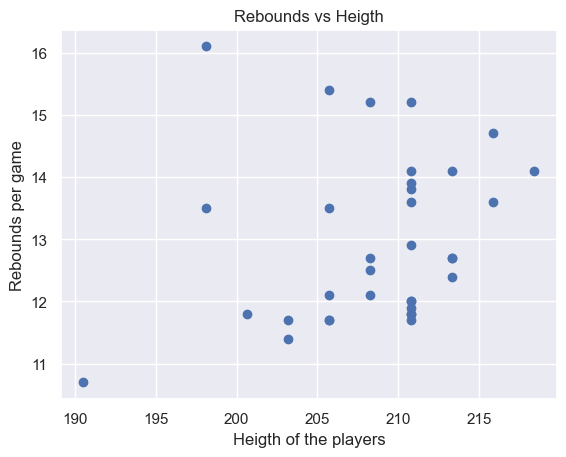

In [ ]:
rebounds = clean_data['reb']
height = clean_data['player_height']


better_rebounder_per_inch = clean_data['reb']/clean_data['player_height']
higher_percentile_rebounds = np.percentile(better_rebounder_per_inch, 98 )
top_25_percent = clean_data[better_rebounder_per_inch > higher_percentile_rebounds]


best_rebounder = top_25_percent.loc[top_25_percent['reb'].idxmax()]
print(best_rebounder['player_name'],best_rebounder['reb'])


plt.scatter( top_25_percent['player_height'] , top_25_percent['reb'], )
plt.xlabel('Heigth of the players')
plt.ylabel('Rebounds per game')
plt.title('Rebounds vs Heigth')
